In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
returns = pd.read_pickle("../Data/returns.pkl")
returns.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9660J1,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop very first row
returns = returns.iloc[1:, :]

In [5]:
def get_investable(stock, t_start, t_end):
    y = returns[[stock]].loc[t_start:t_end, :]
    y.columns = ['Outcome']
    y = y.sort_index(ascending = False)
    
    X = returns.loc[(t_start + pd.DateOffset(-1)):(t_end + pd.DateOffset(-1)), :]
    X = X.sort_index(ascending = False)
    
    df_full = pd.concat([X, y], axis = 1)
    df_full = df_full.sort_index(ascending = False)
    df_full['Outcome'] = df_full['Outcome'].shift(1)
    df_full = df_full.iloc[1:, :]
    
    investable_universe = []

    for col in df_full.columns:
        if ~df_full[col].isna().any():
            investable_universe.append(col)
            
    df_investable = df_full[investable_universe]
    
    return df_investable

In [6]:
# sample parameters
t_start = pd.to_datetime('1990-01-03')
t_end = pd.to_datetime('1999-02-24')
stock = '905270'

In [7]:
investable = get_investable(stock, t_start, t_end)
investable

,905270,921795,904261,905261,916328,936365,902355,912215,905271,921246,...,905652,701667,921509,511339,541798,906828,923298,992765,922853,Outcome
date,,,,,,,,,,,,,,,,,,,,,
1999-02-23,-0.576744,-1.551363,-0.504323,-0.718177,-0.132424,-2.913124,-0.444444,-1.667515,-2.025804,-1.684533,...,0.000000,0.172733,1.497504,-0.512821,0.810485,-1.345756,-0.727277,0.000000,0.000000,-0.243263
1999-02-22,0.111753,5.019815,4.282494,0.937383,2.717539,9.575035,0.106781,2.025974,2.259972,1.240310,...,2.058724,1.049510,-1.313629,-0.510204,3.932692,1.594155,-0.182359,-1.298701,29.166667,-0.576744
1999-02-19,0.111878,0.000000,0.452830,-0.137294,0.000000,2.919708,0.106895,-1.521934,0.188414,0.000000,...,-0.403361,-0.694444,0.827815,-1.754386,-0.280335,0.688310,-1.076628,-1.910828,-7.692308,0.111753
1999-02-18,1.668246,-3.155650,0.913938,1.843142,2.222244,0.735294,0.000000,0.000000,-4.158921,0.467290,...,0.404995,-2.702703,-2.737520,-0.250000,-0.833000,3.073388,-0.713015,0.000000,0.000000,0.111878
1999-02-17,0.228007,0.903614,-1.868460,-0.367275,-4.127726,-0.366884,0.000000,-2.335748,2.979519,-2.134146,...,0.417985,-3.425523,1.803279,0.000000,-0.826118,0.000000,-1.232676,-1.875000,0.000000,1.668246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-09,-1.123596,-2.962370,-0.404606,-1.098524,-0.364707,1.639344,0.000000,0.432900,-0.999463,-1.973684,...,0.697708,0.000000,1.167253,2.127587,-1.504126,-1.796383,0.648312,0.000000,-1.448930,-1.136364
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,1.010101,0.434783,1.009554,1.672241,...,-0.692873,-6.717850,0.390918,0.713973,1.527095,-0.297825,0.000000,0.756322,0.000000,-1.123596
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,-3.174603,0.487211,-0.656531,1.279191,0.673401,...,0.000000,3.475670,-1.538689,2.941670,-0.757762,0.000000,1.315789,0.000000,0.000000,2.017423


In [8]:
# Running linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = investable.iloc[:, :-1]
y = investable["Outcome"]
model.fit(X=X, y=y)

LinearRegression()

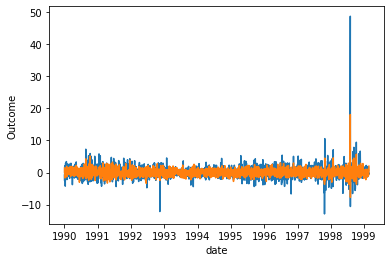

In [9]:
y_pred = model.predict(X)
sns.lineplot(data=investable, x="date", y="Outcome")
sns.lineplot(data=investable, x="date", y=y_pred)

In [11]:
# Start, split, end dates of stock
split_ratio = 0.9

def get_start_split_end(stock):
    df = returns[[stock]].dropna()
    split = int(split_ratio * len(df.index))
    return df.index[0], df.index[split], df.index[-1]

In [12]:
# train test split
start, split, end = get_start_split_end(stock)
investable = get_investable(stock, start, end)
test = investable.loc[:split]
train = investable.loc[split:]

In [13]:
train

,905270,921795,904261,905261,916328,936365,902355,912215,905271,921246,...,905652,701667,921509,511339,541798,906828,923298,992765,922853,Outcome
date,,,,,,,,,,,,,,,,,,,,,
1998-03-30,-0.719926,0.375811,0.682335,1.412796,-1.331422,7.595778,-1.176872,-0.157805,-0.381221,-0.129366,...,0.609354,1.074689,0.447761,0.431965,-0.177762,1.927937,0.413415,-1.667048,0.826446,2.479532
1998-03-27,1.008679,0.480604,1.696222,-2.036271,-0.331456,5.614545,0.119536,1.779096,-0.756413,0.129534,...,0.604755,-0.356571,-1.033973,0.433839,0.535498,0.276901,0.000000,-1.176099,-1.626016,-0.719926
1998-03-26,-1.159286,-1.086587,0.737864,-0.929866,1.089719,1.906913,1.070072,-2.634428,-1.047984,0.651890,...,0.000000,-1.408451,-0.441176,-0.431965,-0.355516,0.000000,0.625333,-0.235117,0.819672,1.008679
1998-03-25,2.373606,0.443383,-1.904762,0.746269,-2.849889,-0.542003,0.433351,-0.669136,-0.223862,-0.776197,...,-0.305583,1.067040,-1.018923,-0.856531,-0.530763,-3.980148,0.000000,-0.930233,1.666667,-1.159286
1998-03-24,1.518072,-0.170242,3.427896,2.373212,-0.566863,1.096772,1.997878,-0.297832,0.374675,1.045752,...,0.306520,0.357714,0.881057,-2.301255,1.254194,3.146348,-0.826446,0.467290,-0.826446,2.373606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-09,-1.123596,-2.962370,-0.404606,-1.098524,-0.364707,1.639344,0.000000,0.432900,-0.999463,-1.973684,...,0.697708,0.000000,1.167253,2.127587,-1.504126,-1.796383,0.648312,0.000000,-1.448930,-1.136364
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,1.010101,0.434783,1.009554,1.672241,...,-0.692873,-6.717850,0.390918,0.713973,1.527095,-0.297825,0.000000,0.756322,0.000000,-1.123596
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,-3.174603,0.487211,-0.656531,1.279191,0.673401,...,0.000000,3.475670,-1.538689,2.941670,-0.757762,0.000000,1.315789,0.000000,0.000000,2.017423


In [14]:
test

,905270,921795,904261,905261,916328,936365,902355,912215,905271,921246,...,905652,701667,921509,511339,541798,906828,923298,992765,922853,Outcome
date,,,,,,,,,,,,,,,,,,,,,
1999-02-26,0.112931,-1.305813,0.497866,-2.815830,0.134804,-1.379310,-0.211454,-3.429391,0.982639,-1.284109,...,1.183941,-2.538335,-0.698080,0.000000,-0.261733,4.804404,-0.936036,4.575163,-3.296703,-0.714420
1999-02-25,-0.337648,-2.304527,1.296830,-0.076046,1.093152,-2.357428,-0.228551,-0.647752,0.196573,0.646204,...,1.596501,0.681429,-2.551020,3.225806,1.060904,-0.682057,-0.928532,1.324503,-1.086957,0.112931
1999-02-24,-0.243263,3.492334,0.506879,-1.596408,-3.046476,-0.999467,1.571429,-0.077670,-4.511119,-3.582555,...,0.804674,1.381689,-3.606557,-4.123711,1.072280,0.000000,-1.281180,-0.657895,-1.075269,-0.337648
1999-02-23,-0.576744,-1.551363,-0.504323,-0.718177,-0.132424,-2.913124,-0.444444,-1.667515,-2.025804,-1.684533,...,0.000000,0.172733,1.497504,-0.512821,0.810485,-1.345756,-0.727277,0.000000,0.000000,-0.243263
1999-02-22,0.111753,5.019815,4.282494,0.937383,2.717539,9.575035,0.106781,2.025974,2.259972,1.240310,...,2.058724,1.049510,-1.313629,-0.510204,3.932692,1.594155,-0.182359,-1.298701,29.166667,-0.576744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-04-03,-0.850575,0.529977,4.522995,-0.483481,1.050108,-3.789461,1.402597,1.659942,0.150845,1.354680,...,0.602907,3.401361,0.691563,-1.652893,-0.515875,-1.545375,1.026362,-0.917431,-2.040816,-2.318572
1998-04-02,1.021830,0.969900,-1.201652,0.193767,1.809489,-0.834408,-0.327925,2.735670,0.303129,0.495050,...,-1.191448,-2.000000,2.698864,0.207039,-0.851247,1.305417,0.206750,1.395349,18.548387,-0.850575
1998-04-01,-1.711938,-1.189689,-0.224803,0.945395,0.912705,3.010054,0.103663,1.198466,-0.452375,3.589744,...,0.294647,4.166667,4.761905,1.898734,0.858555,1.054707,0.829881,0.000000,0.000000,1.021830


In [15]:
# fitting linear regression on train
X = train.iloc[:, :-1]
y = train["Outcome"]
model.fit(X=X, y=y)

LinearRegression()

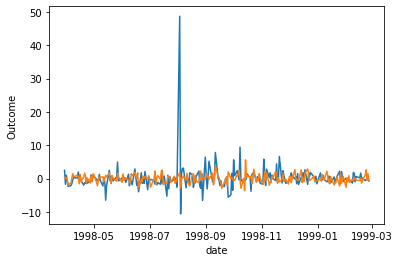

In [16]:
# predicting on test data
y_pred = model.predict(test.iloc[:, :-1])
sns.lineplot(data=test, x="date", y="Outcome")
sns.lineplot(data=test, x="date", y=y_pred)

In [17]:
# model metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: " + str(mean_squared_error(y_true=test["Outcome"], y_pred=y_pred)))
print("MAE: " + str(mean_absolute_error(y_true=test["Outcome"], y_pred=y_pred)))
print("R2: " + str(r2_score(y_true=test["Outcome"], y_pred=y_pred)))

MSE: 15.197208144071297
MAE: 1.9262185181669889
R2: -0.02376553728045261
